# **TP07: Arbre de décision**
Un arbre de décision est un schéma représentant les résultats possibles d'une série de choix interconnectés.

Il permet d'évaluer différentes actions possibles en fonction de leur coût, leur probabilité, de leurs bénéfices. 

Il peut être utilisé  pour générer un algorithme qui détermine le meilleur choix de façon mathématique.

## **Partie I:Build decision tree model to predict survival based on certain parameters**
Les données sont stocker dans le fichier Titanic.csv qui contient des données des passagers du Titanic. Chaque ligne représente une personne. Les colonnes décrivent différents attributs de la personne, notamment si elle a survécu, son âge, sa classe de passagers, son sexe...

**Q1-** Importer les données

In [27]:
import seaborn as sns
#1
dt_titanic=sns.load_dataset("titanic")


In [28]:
dt_titanic['sex']=dt_titanic['sex'].replace(['male','female'],[0,1])
### for remove nan value
dt_titanic["age"] = dt_titanic['age'].replace(np.nan, True)
dt_titanic["sex"] = dt_titanic['sex'].replace(np.nan, True)
dt_titanic["pclass"] = dt_titanic['pclass'].replace(np.nan, True)

dt_titanic.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,0,22,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,1,38,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,1,26,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,1,35,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,0,35,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,0,True,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,0,54,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,0,2,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,1,27,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,1,14,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


Q2-Construire le Modèle d'arbre de décision en utilisant **"DecisionTreeClassifier"** de sklearn.tree 

Nous allons utiliser 80% du dataSet pour l'entrainement et 20% pour le teste du modèle.

In [29]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split as tts
import numpy as np
import matplotlib.pyplot as plt

x=np.array(dt_titanic[dt_titanic.columns[1:-11]])
y=np.array(dt_titanic["survived"])
x_train,x_test,y_train,y_test=tts(x,y,test_size=0.1,train_size=0.8)
model1=DecisionTreeClassifier().fit(x_train,y_train)

In [36]:
!pip install pydotplus

ERROR: Could not find a version that satisfies the requirement sklearn.externals (from versions: none)
ERROR: No matching distribution found for sklearn.externals


**Q3** Génér l'image de notre arbre

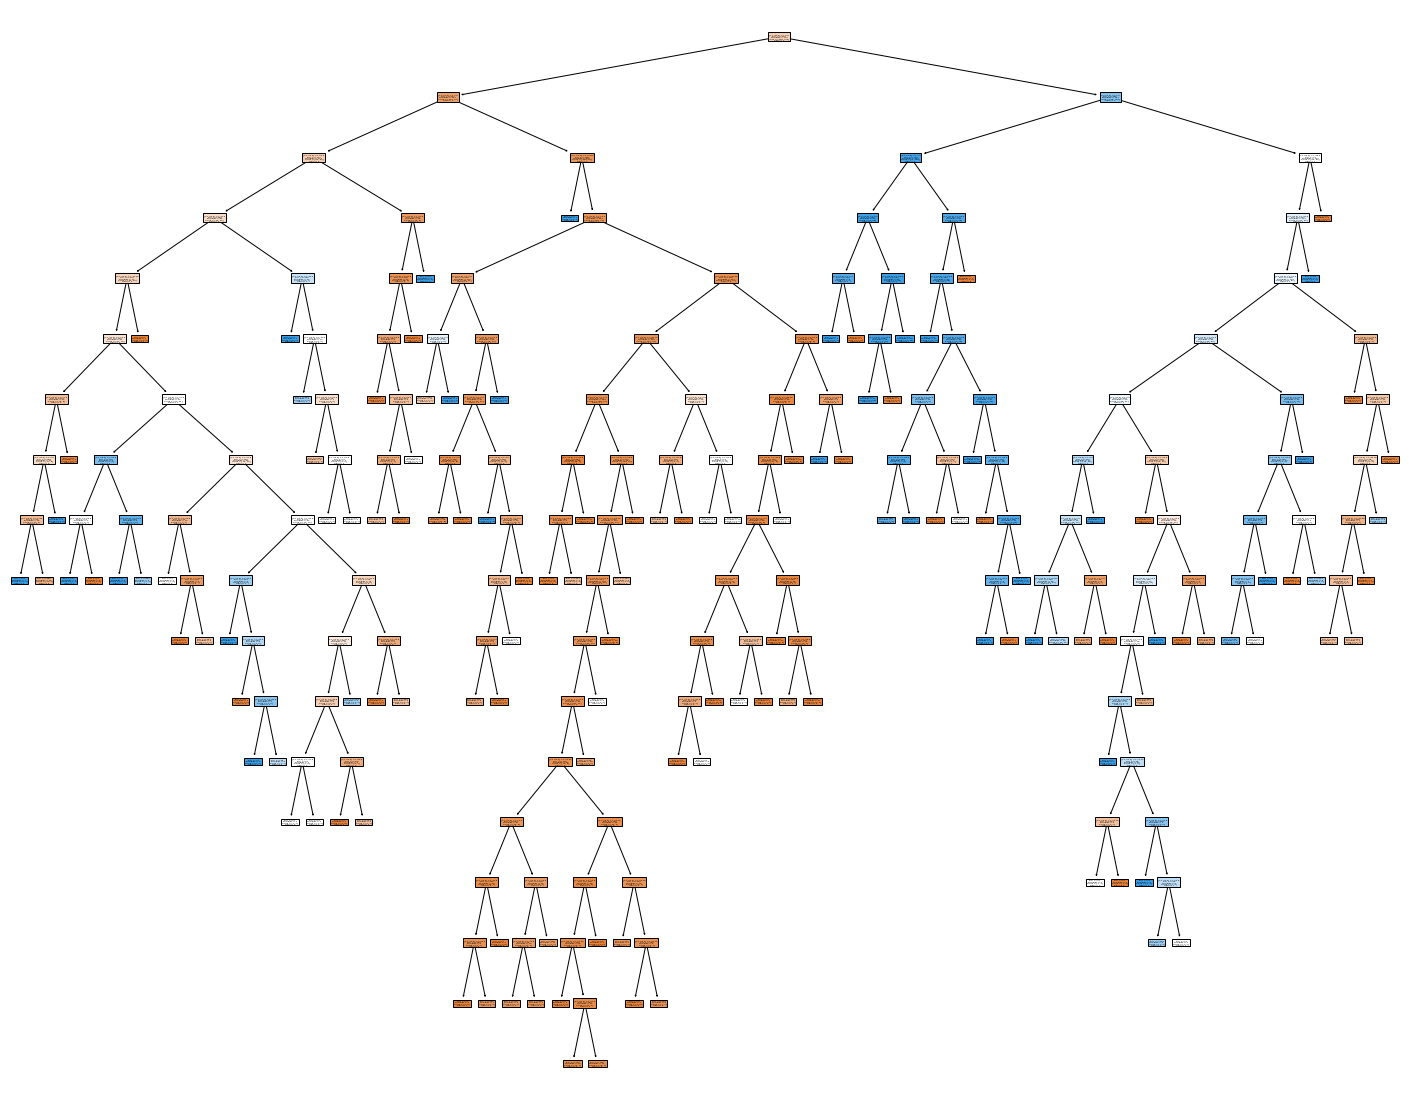

In [39]:
from sklearn import tree
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(model1, 
                   feature_names=x,  
                   class_names=['0','1'],
                   filled=True)

**Q4- prediction** 

Voici des information de trois passagers:

passager1:  {"pclass": 1, "sex":1 , "age": 20}

passager2:  {"pclass": 2, "sex":1 , "age": 7}

passager3:  {"pclass": 3, "sex": 0, "age": 35}

1- Créer un DataFrame à partir de ce données

2- Lequel des passagers vont etre par les survivant?

3-Comparer les résultats avec la méthode du KNN

In [41]:
#1
import pandas as pd 
passanger={"pclass":[1,2,3],"sex":[1,1,0],"age":[20,7,35]}
d1=pd.DataFrame(passanger,columns=["pclass","sex","age"])
d1.head()

,pclass,sex,age
0,1,1,20
1,2,1,7
2,3,0,35


In [47]:
#2
y_pred=model1.predict(np.array(d1))
y_pred

array([1, 1, 0], dtype=int64)

In [50]:
# using knn 
from sklearn.neighbors import KNeighborsClassifier 

model2=KNeighborsClassifier(n_neighbors=3).fit(x_train,y_train)
y_pred2=model2.predict(np.array(d1))

In [51]:
y_pred2

array([1, 1, 0], dtype=int64)

## **Partie II**

Les données sont stocker dans le fichier salaries.csv qui contient des données des salariés. Chaque ligne représente une personne. Les colonnes décrivent différents attributs de la personne, notamment si elle a un salaire plus que 100K, la companie, diplome. 

L'objectif de cette partie est de prédire le salaire une personne en fonction de son diplome, profession et la company.

 **Q_1** Importer les données

In [52]:
df=pd.read_csv("salaries.csv")

**Q2-**1-Construiser X et Y 

X: les trois colonne "company","job" et "degrees"

y: "salary_more_then_100k"

2- Transformer la variable qualitatif ( utiliser **LabelEncoder** from **sklearn.preprocessing **)

-"company" en variable numérique( google=2,abc pharma=1, facebook=0)

-"job"en variable numérique( sales executive=2,computer programmer =1, business manager=0)

-"degrees"en variable numérique( bachelors=0,masters =1)




In [58]:
#1
x=np.array(df[df.columns[:-1]])
y=np.array(df["salary_more_then_100k"])

In [62]:
#2
import sklearn.preprocessing as prep
le=prep.LabelEncoder()
company=le.fit_transform(list(df["company"]))
job=le.fit_transform(list(df["job"]))
degree=le.fit_transform(list(df["degrees"]))

In [66]:
print(company,"\n",job,"\n",degree)
x=list(zip(company,job,degree))

[2 2 2 2 2 2 0 0 0 0 1 1 1 1 1 1] 
 [2 2 0 0 1 1 2 1 0 0 2 2 0 0 1 1] 
 [0 1 0 1 0 1 1 0 0 1 0 1 0 1 0 1]


**Q3**- Construire le Modèle d'arbre de décision en utilisant **"DecisionTreeClassifier"** de sklearn.tree.

In [67]:
X_train,X_test,Y_train,Y_test=tts(x,y,test_size=0.1)
mdl=DecisionTreeClassifier().fit(X_train,Y_train)

**Q4** Génér l'image de notre arbre

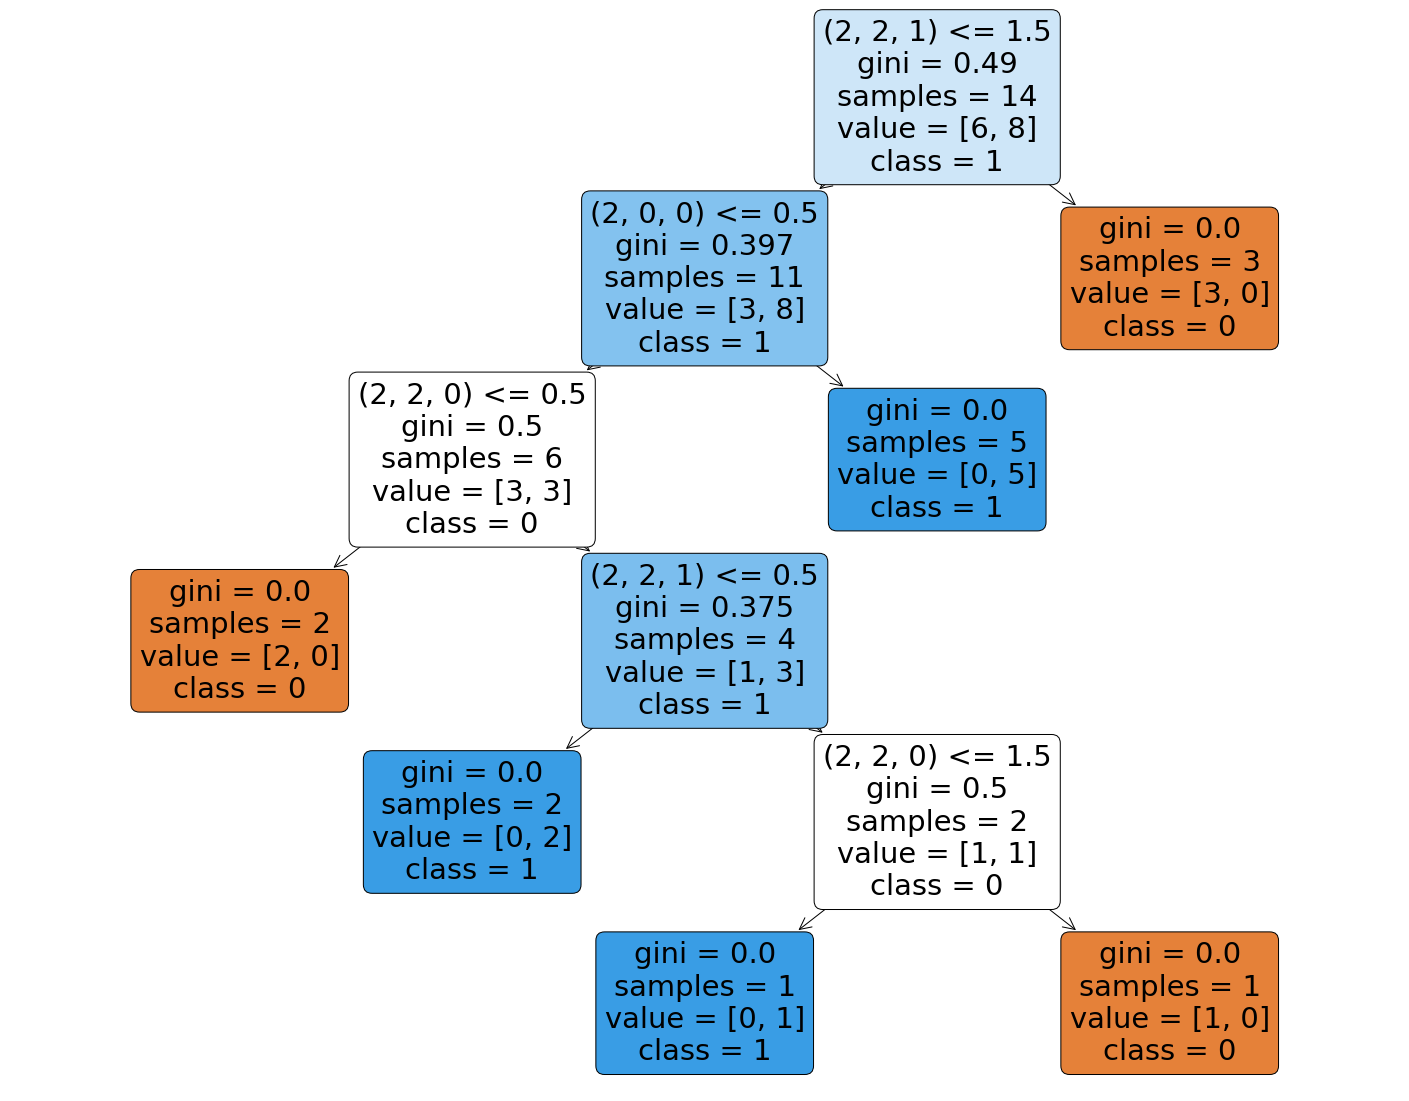

In [76]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(mdl, 
                   feature_names=x,  
                   class_names=['0','1'],
                   filled=True,rounded=True)

**Q4- prediction** 

Voici des information de trois salarié:

salaries1:  {"company": google, "job":computer programmer , "degrees": bachelor}

salaries2:  {"company": facebook, "job":computer programmer , "degrees": masters}

salaries3:  {"company": abc pharma, "job": business manager, "degrees": masters}

1- Créer un DataFrame à partir de ce données

2- Lequel des salariés vont avoir un salaire plus que 100K?

In [80]:
data2={"company":["google","facebook","abc pharma"],"job":["computer programmer","computer programmer","business manager"],
       "degrees":["bachelor","masters","masters"]}
d=pd.DataFrame(data2,columns=["company","job","degrees"])
d.head()

,company,job,degrees
0,google,computer programmer,bachelor
1,facebook,computer programmer,masters
2,abc pharma,business manager,masters


In [83]:
company=le.fit_transform(list(d["company"]))
job=le.fit_transform(list(d["job"]))
degree=le.fit_transform(list(d["degrees"]))
x_pred=list(zip(company,job,degree))

In [85]:
mdl.predict(x_pred)

array([0, 1, 1], dtype=int64)